## The day of the week with Monday=0, Sunday=6

In [1]:
import os

directory = os.getcwd() + '/input/'
inputs = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        inputs.append(os.path.join(directory, filename))
    else:
        continue

In [2]:
import pandas as pd
df_Shanghai = pd.read_csv(inputs[0])
df_Beijing = pd.read_csv(inputs[1])
df_Shenyang = pd.read_csv(inputs[2])
df_Chengdu = pd.read_csv(inputs[3])
df_Guangzhou = pd.read_csv(inputs[4])

In [3]:
df_Shanghai = df_Shanghai[['year', 'month', 'day', 'PM_Jingan', 'PM_US Post', 'PM_Xuhui']]
df_Beijing = df_Beijing[['year', 'month', 'day', 'PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']]
df_Shenyang = df_Shenyang[['year', 'month', 'day', 'PM_Taiyuanjie', 'PM_US Post', 'PM_Xiaoheyan']]
df_Chengdu = df_Chengdu[['year', 'month', 'day', 'PM_Caotangsi', 'PM_Shahepu', 'PM_US Post']]
df_Guangzhou = df_Guangzhou[['year', 'month', 'day', 'PM_City Station', 'PM_5th Middle School', 'PM_US Post']]

In [4]:
df_Shanghai['Date'] = pd.to_datetime(df_Shanghai.year*10000+df_Shanghai.month*100+df_Shanghai.day,format='%Y%m%d')
df_Beijing['Date'] = pd.to_datetime(df_Beijing.year*10000+df_Beijing.month*100+df_Beijing.day,format='%Y%m%d')
df_Shenyang['Date'] = pd.to_datetime(df_Shenyang.year*10000+df_Shenyang.month*100+df_Shenyang.day,format='%Y%m%d')
df_Chengdu['Date'] = pd.to_datetime(df_Chengdu.year*10000+df_Chengdu.month*100+df_Chengdu.day,format='%Y%m%d')
df_Guangzhou['Date'] = pd.to_datetime(df_Guangzhou.year*10000+df_Guangzhou.month*100+df_Guangzhou.day,format='%Y%m%d')

In [5]:
df_Shanghai.set_index(df_Shanghai['Date'],inplace=True)
df_Beijing.set_index(df_Beijing['Date'],inplace=True)
df_Shenyang.set_index(df_Shenyang['Date'],inplace=True)
df_Chengdu.set_index(df_Chengdu['Date'],inplace=True)
df_Guangzhou.set_index(df_Guangzhou['Date'],inplace=True)

In [6]:
del df_Shanghai['year'], df_Shanghai['month'], df_Shanghai['day'], df_Shanghai['Date']
del df_Beijing['year'], df_Beijing['month'], df_Beijing['day'], df_Beijing['Date']
del df_Shenyang['year'], df_Shenyang['month'], df_Shenyang['day'], df_Shenyang['Date']
del df_Chengdu['year'], df_Chengdu['month'], df_Chengdu['day'], df_Chengdu['Date']
del df_Guangzhou['year'], df_Guangzhou['month'], df_Guangzhou['day'], df_Guangzhou['Date']

In [7]:
#df = df_Shanghai.merge(df_Beijing, how='inner', left_index=True, right_index=True)
#df = df.merge(df_Shenyang, how='inner', left_index=True, right_index=True)
#df = df.merge(df_Chengdu, how='inner', left_index=True, right_index=True)
#df = df.merge(df_Guangzhou, how='inner', left_index=True, right_index=True)

In [8]:
df_Shanghai['PM_mean'] = df_Shanghai.mean(axis=1)
df_Beijing['PM_mean'] = df_Beijing.mean(axis=1)
df_Shenyang['PM_mean'] = df_Shenyang.mean(axis=1)
df_Chengdu['PM_mean'] = df_Chengdu.mean(axis=1)
df_Guangzhou['PM_mean'] = df_Guangzhou.mean(axis=1)

In [14]:
dow_Shanghai_min = df_Shanghai.groupby(df_Shanghai.index.dayofweek)['PM_mean'].min()
dow_Beijing_min = df_Beijing.groupby(df_Beijing.index.dayofweek)['PM_mean'].min()
dow_Shenyang_min = df_Shenyang.groupby(df_Shenyang.index.dayofweek)['PM_mean'].min()
dow_Chengdu_min = df_Chengdu.groupby(df_Chengdu.index.dayofweek)['PM_mean'].min()
dow_Guangzhou_min = df_Guangzhou.groupby(df_Guangzhou.index.dayofweek)['PM_mean'].min()

dow_Shanghai_mean = df_Shanghai.groupby(df_Shanghai.index.dayofweek)['PM_mean'].mean()
dow_Beijing_mean = df_Beijing.groupby(df_Beijing.index.dayofweek)['PM_mean'].mean()
dow_Shenyang_mean = df_Shenyang.groupby(df_Shenyang.index.dayofweek)['PM_mean'].mean()
dow_Chengdu_mean = df_Chengdu.groupby(df_Chengdu.index.dayofweek)['PM_mean'].mean()
dow_Guangzhou_mean = df_Guangzhou.groupby(df_Guangzhou.index.dayofweek)['PM_mean'].mean()

dow_Shanghai_max = df_Shanghai.groupby(df_Shanghai.index.dayofweek)['PM_mean'].max()
dow_Beijing_max = df_Beijing.groupby(df_Beijing.index.dayofweek)['PM_mean'].max()
dow_Shenyang_max = df_Shenyang.groupby(df_Shenyang.index.dayofweek)['PM_mean'].max()
dow_Chengdu_max = df_Chengdu.groupby(df_Chengdu.index.dayofweek)['PM_mean'].max()
dow_Guangzhou_max = df_Guangzhou.groupby(df_Guangzhou.index.dayofweek)['PM_mean'].max()

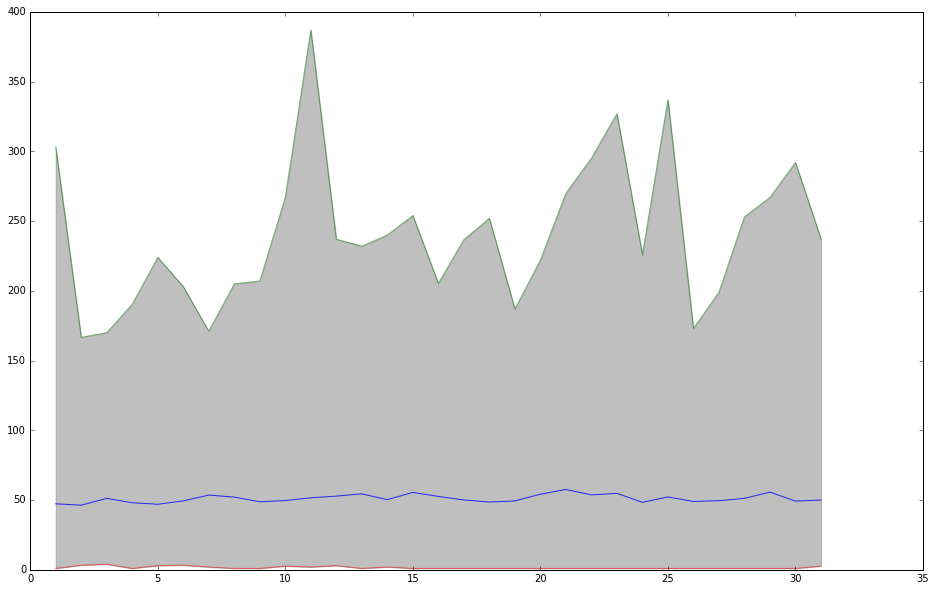

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

y_min = dow_Guangzhou_min
y_mean = dow_Guangzhou_mean
y_max = dow_Guangzhou_max

x = dow_Guangzhou_min.index

plt.figure(figsize=(16, 10))
plt.plot(x, y_min, color='red', alpha=0.5)
plt.plot(x, y_mean, color='blue', alpha=0.8) 
plt.plot(x, y_max, color='green', alpha=0.5)         
plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
plt.show()

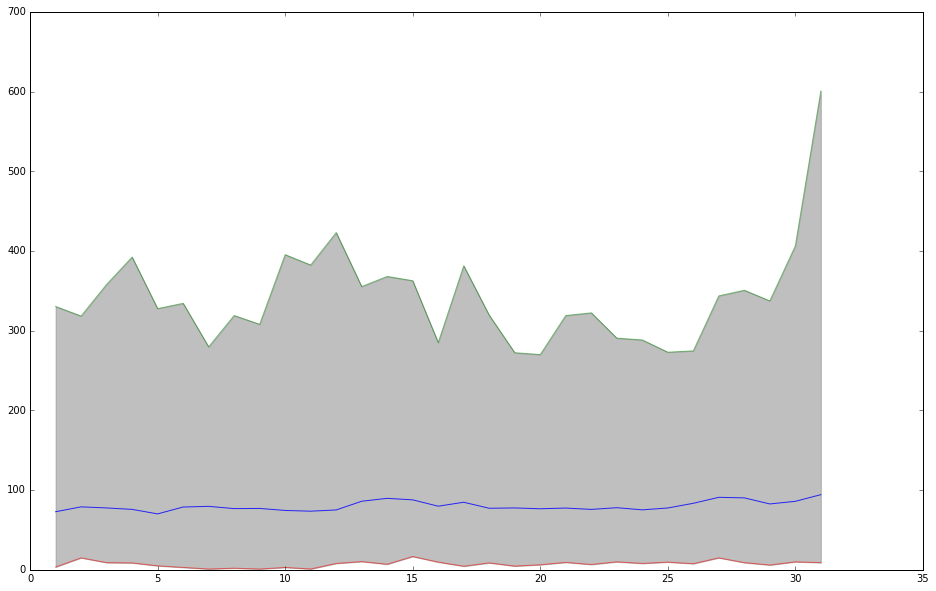

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

y_min = dow_Chengdu_min
y_mean = dow_Chengdu_mean
y_max = dow_Chengdu_max

x = dow_Chengdu_min.index

plt.figure(figsize=(16, 10))
plt.plot(x, y_min, color='red', alpha=0.5)
plt.plot(x, y_mean, color='blue', alpha=0.8) 
plt.plot(x, y_max, color='green', alpha=0.5)         
plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
plt.show()

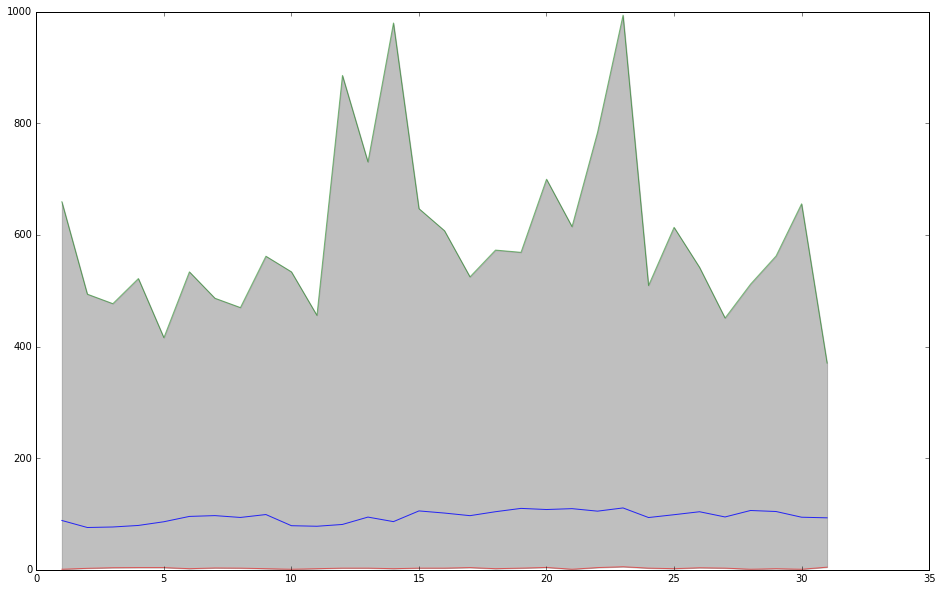

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

y_min = dow_Beijing_min
y_mean = dow_Beijing_mean
y_max = dow_Beijing_max

x = dow_Beijing_min.index

plt.figure(figsize=(16, 10))
plt.plot(x, y_min, color='red', alpha=0.5)
plt.plot(x, y_mean, color='blue', alpha=0.8) 
plt.plot(x, y_max, color='green', alpha=0.5)         
plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
plt.show()

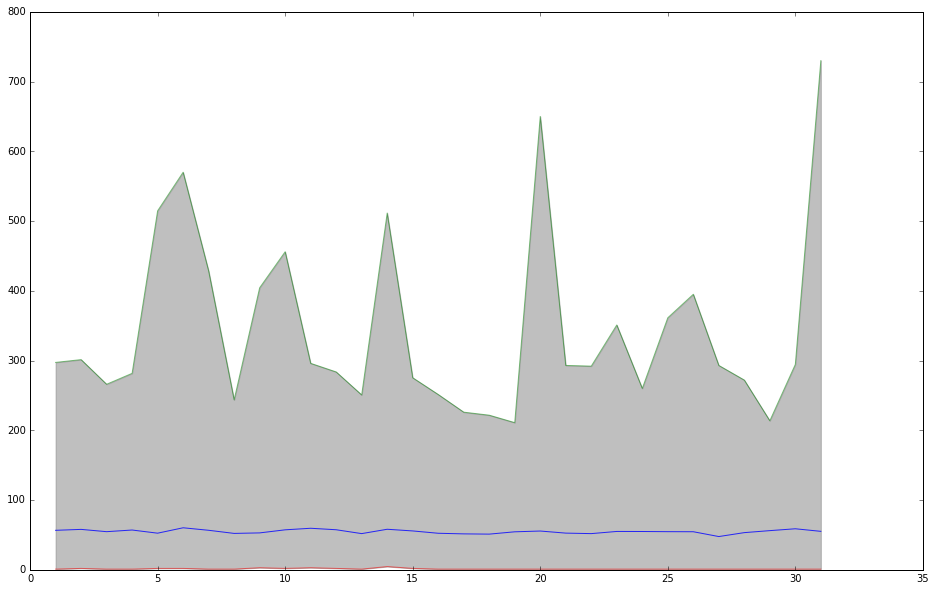

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

y_min = dow_Shanghai_min
y_mean = dow_Shanghai_mean
y_max = dow_Shanghai_max

x = dow_Shanghai_min.index

plt.figure(figsize=(16, 10))
plt.plot(x, y_min, color='red', alpha=0.5)
plt.plot(x, y_mean, color='blue', alpha=0.8) 
plt.plot(x, y_max, color='green', alpha=0.5)         
plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
plt.show()

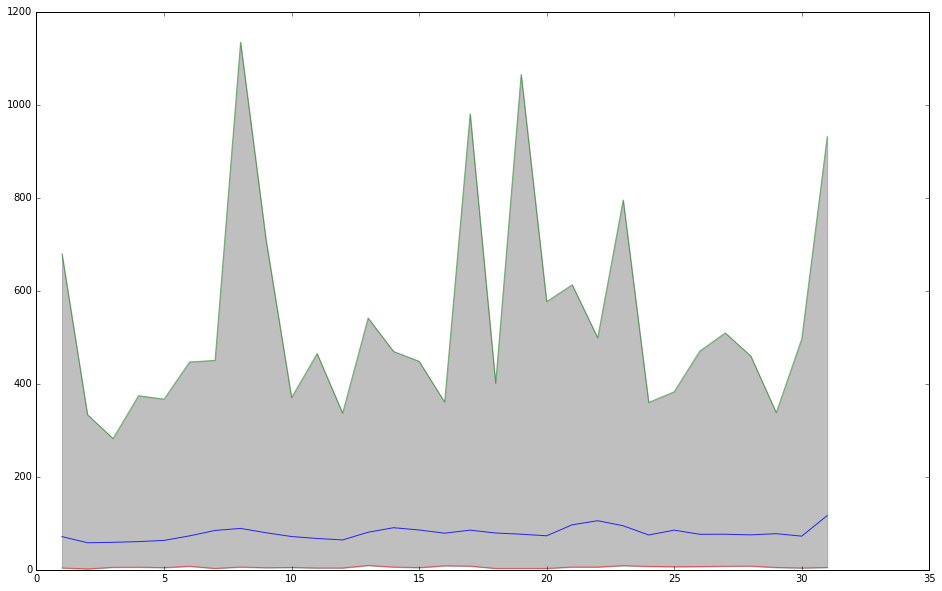

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

y_min = dow_Shenyang_min
y_mean = dow_Shenyang_mean
y_max = dow_Shenyang_max

x = dow_Shenyang_min.index

plt.figure(figsize=(16, 10))
plt.plot(x, y_min, color='red', alpha=0.5)
plt.plot(x, y_mean, color='blue', alpha=0.8) 
plt.plot(x, y_max, color='green', alpha=0.5)         
plt.fill_between(x, y_min, y_max, color='grey', alpha=0.5)
plt.show()